<div style="text-align: center; font-size: 30px">DATA LOADING, CLEANING & EDA</div>

<div style="font-size: 20px; font-weight: bold">LOADING</div>

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.stats import skew, kurtosis
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Load df
df = pd.read_csv("audio_features.csv")

<div style="font-size: 20px; font-weight: bold">EDA</div>

# df overview

In [3]:
df.shape

(999, 224)

In [4]:
# Df overview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 224 entries, rms_mean to label
dtypes: float64(222), object(2)
memory usage: 1.7+ MB


,rms_mean,rms_std,rms_max,rms_min,rms_skew,rms_kurtosis,zcr_mean,zcr_std,zcr_max,zcr_min,...,chroma_cqt10_skew,chroma_cqt10_kurtosis,chroma_cqt11_mean,chroma_cqt11_std,chroma_cqt11_min,chroma_cqt11_max,chroma_cqt11_skew,chroma_cqt11_kurtosis,filename,label
0,0.020713,0.014193,0.082619,0.003360,1.230320,1.489241,0.063742,0.028594,0.180176,0.009277,...,1.058182,-0.281785,0.214191,0.208159,0.030045,1.000000,2.521216,6.545759,classical.00072.wav,classical
1,0.029710,0.016566,0.099159,0.003439,0.860528,0.802966,0.063705,0.029301,0.186035,0.016602,...,0.814741,-0.757137,0.231473,0.156859,0.012648,1.000000,1.604591,3.426752,classical.00030.wav,classical
2,0.029499,0.020230,0.108574,0.002613,0.913463,0.553828,0.086217,0.029102,0.198242,0.026367,...,0.053029,-1.472771,0.240709,0.130534,0.019854,1.000000,1.129880,1.973275,classical.00010.wav,classical
3,0.044323,0.033052,0.179927,0.005385,1.417183,1.916810,0.075839,0.027404,0.160645,0.017090,...,0.937287,-0.514512,0.324423,0.201675,0.049456,1.000000,1.519959,2.455826,classical.00038.wav,classical
4,0.013986,0.009004,0.052015,0.001963,0.919975,1.215321,0.070119,0.035137,0.187012,0.002930,...,1.458900,1.617633,0.200864,0.175486,0.017570,0.813503,1.400728,1.204524,classical.00094.wav,classical


In [5]:
# Summary stats
df.describe()

,rms_mean,rms_std,rms_max,rms_min,rms_skew,rms_kurtosis,zcr_mean,zcr_std,zcr_max,zcr_min,...,chroma_cqt10_min,chroma_cqt10_max,chroma_cqt10_skew,chroma_cqt10_kurtosis,chroma_cqt11_mean,chroma_cqt11_std,chroma_cqt11_min,chroma_cqt11_max,chroma_cqt11_skew,chroma_cqt11_kurtosis
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.130826,0.048341,0.277283,0.029303,0.410728,0.250139,0.103651,0.049398,0.365906,0.019750,...,0.080697,0.988292,0.749781,0.586699,0.441094,0.216899,0.080038,0.987072,0.770240,0.564101
std,0.065671,0.026745,0.123934,0.029720,0.621539,1.707869,0.041824,0.023428,0.165245,0.015762,...,0.060514,0.058232,0.720462,2.314246,0.146824,0.054251,0.057162,0.057433,0.692290,2.075125
min,0.005270,0.002070,0.019861,0.000000,-3.125646,-1.499318,0.021697,0.006640,0.057129,0.000000,...,0.001541,0.378045,-3.877765,-1.783513,0.089949,0.061511,0.003035,0.453878,-1.613796,-1.753159
25%,0.086566,0.030666,0.190635,0.008365,0.042112,-0.552916,0.070374,0.032881,0.234375,0.008301,...,0.035398,1.000000,0.275507,-0.726013,0.336745,0.177367,0.035142,1.000000,0.323311,-0.716943
50%,0.122181,0.042685,0.261332,0.020009,0.364577,-0.212433,0.099503,0.044971,0.341797,0.015137,...,0.064195,1.000000,0.711945,-0.107527,0.436372,0.212516,0.066264,1.000000,0.743062,-0.022400
75%,0.175621,0.059867,0.347751,0.040391,0.732317,0.437810,0.132097,0.060245,0.474365,0.025879,...,0.109712,1.000000,1.143387,1.061000,0.542602,0.254985,0.110918,1.000000,1.154001,1.122752
max,0.397734,0.166446,0.678699,0.169621,3.318174,17.019512,0.274631,0.169465,0.849609,0.103516,...,0.430860,1.000000,4.007082,21.401882,0.863262,0.386737,0.328409,1.000000,3.770387,18.051289


<div style="font-size: 20px; font-weight: bold">Univariate Analysis</div>

In [6]:
# Check value_counts of categorical values
df["label"].value_counts()

label
classical    100
blues        100
country      100
disco        100
hiphop       100
metal        100
reggae       100
pop          100
rock         100
jazz          99
Name: count, dtype: int64

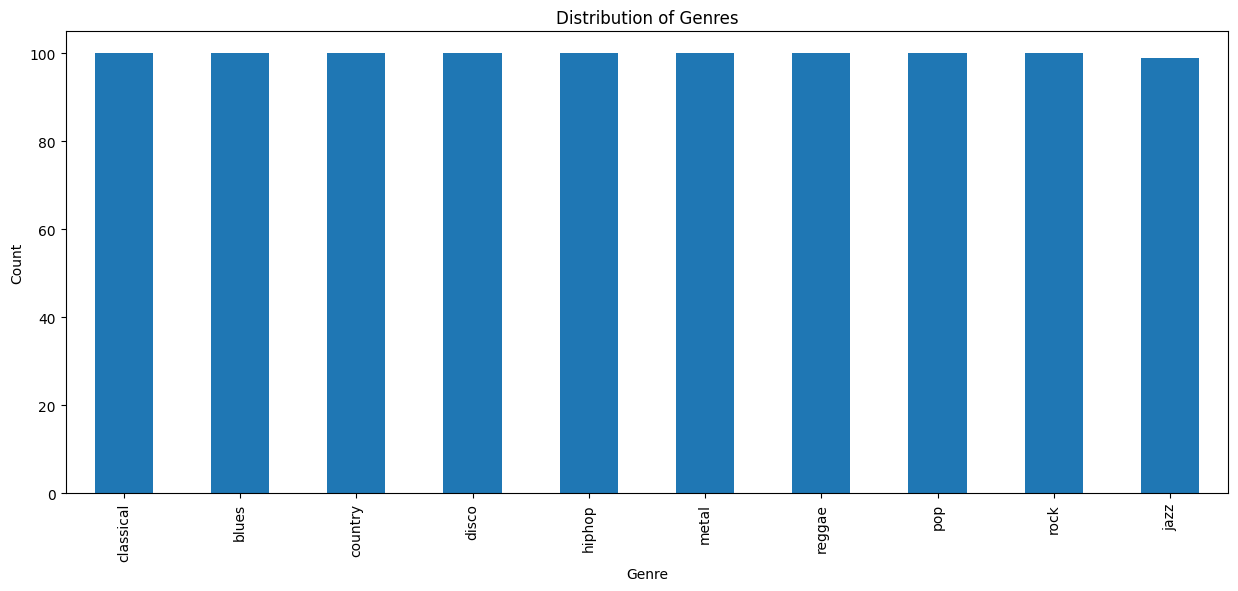

In [7]:
# Plot distribution of target
df["label"].value_counts().plot(kind="bar", figsize=(15, 6))
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Genres");

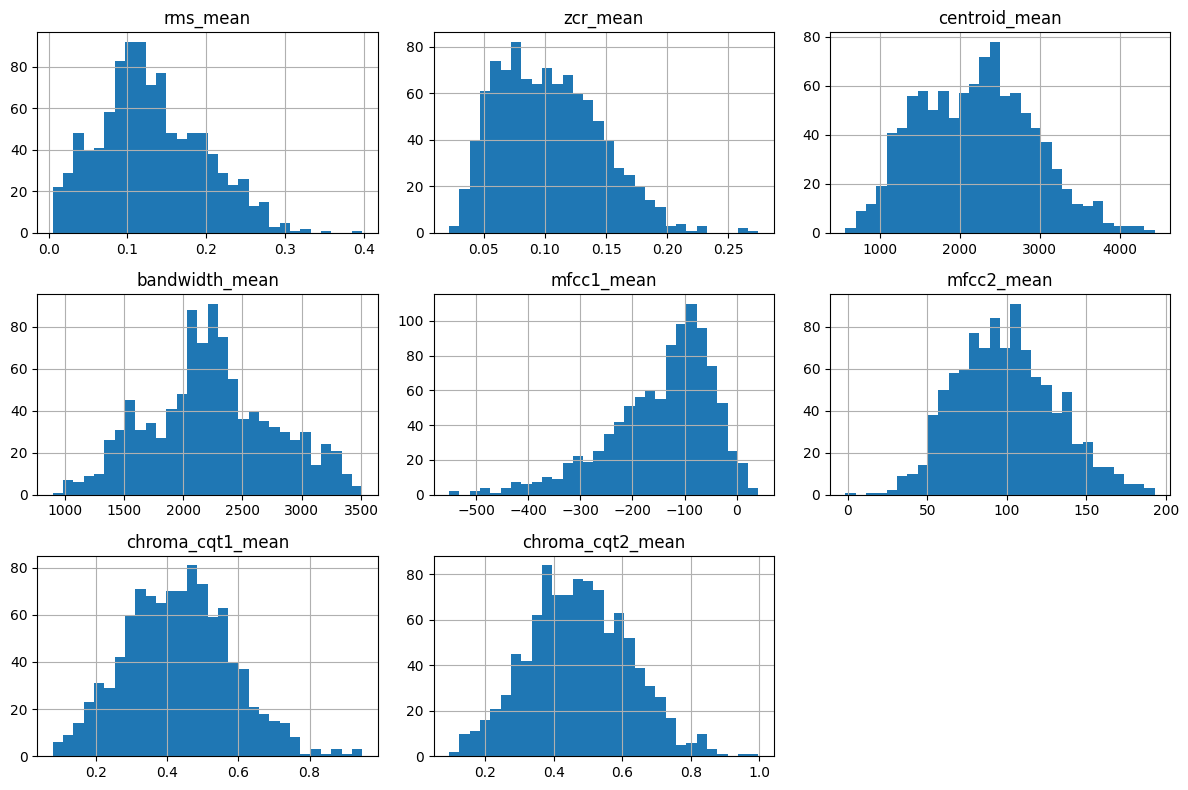

In [8]:
# Visualize a few features
features = ['rms_mean', 'zcr_mean', 'centroid_mean', 'bandwidth_mean', 'mfcc1_mean', 'mfcc2_mean', "chroma_cqt1_mean", "chroma_cqt2_mean"]

# Plot histograms
df[features].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

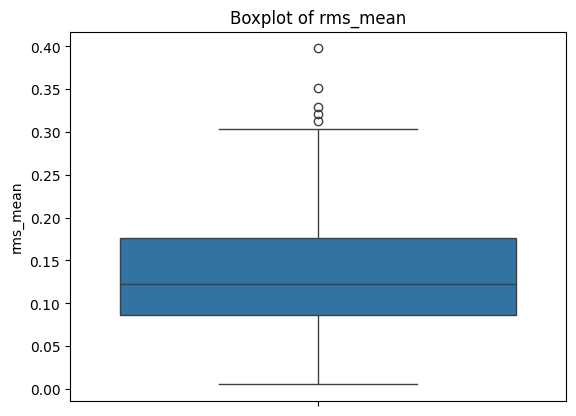

In [9]:
# Boxplot of rms_mean
sns.boxplot(df["rms_mean"])
plt.title("Boxplot of rms_mean")
plt.show()

/tmp/ipykernel_19140/3266588326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="rms_mean", data=df, palette="Set2", legend=False)


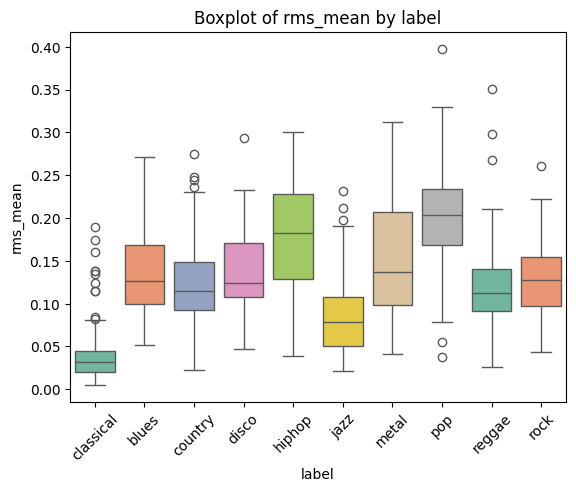

In [10]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="rms_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of rms_mean by label")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_19140/1468942523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="centroid_mean", data=df, palette="Set2", legend=False)


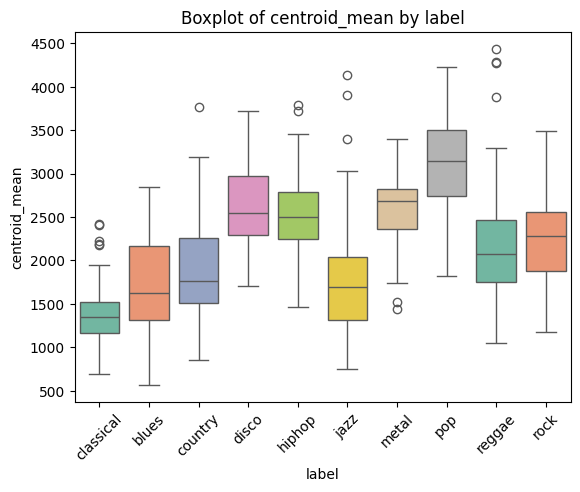

In [11]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="centroid_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of centroid_mean by label")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_19140/3750018835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="mfcc1_mean", data=df, palette="Set2", legend=False)


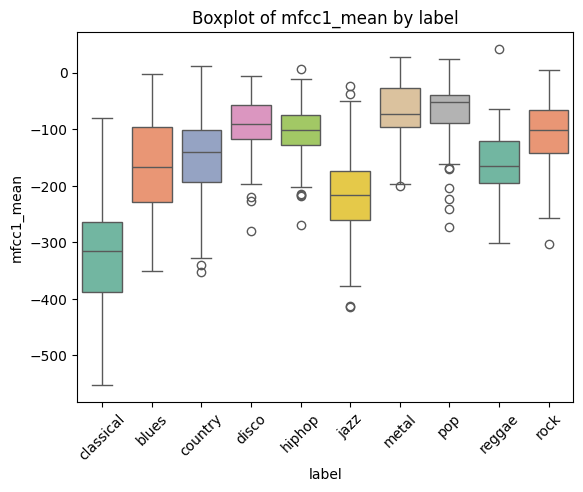

In [12]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="mfcc1_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of mfcc1_mean by label")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_19140/794332449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="chroma_cqt2_mean", data=df, palette="Set2", legend=False)


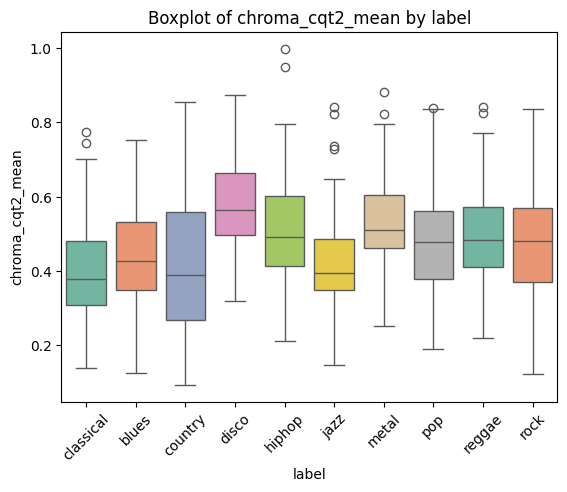

In [13]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="chroma_cqt2_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of chroma_cqt2_mean by label")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Summary statistics
df[features].describe()

,rms_mean,zcr_mean,centroid_mean,bandwidth_mean,mfcc1_mean,mfcc2_mean,chroma_cqt1_mean,chroma_cqt2_mean
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.130826,0.103651,2202.419119,2242.763943,-144.530189,99.531221,0.433165,0.473495
std,0.065671,0.041824,716.076969,526.517009,100.263519,31.331607,0.148377,0.148306
min,0.005270,0.021697,570.349904,900.409298,-552.158600,-1.471577,0.080103,0.094103
25%,0.086566,0.070374,1626.527014,1907.133128,-200.912970,76.771480,0.328013,0.370947
50%,0.122181,0.099503,2209.486740,2221.373053,-120.349420,98.435830,0.435921,0.470166
75%,0.175621,0.132097,2691.962733,2578.883006,-73.818312,119.790992,0.530027,0.578353
max,0.397734,0.274631,4435.732059,3509.656096,42.091450,193.074460,0.947777,0.998194


<div style="font-size: 20px; font-weight: bold">Multivariate Analysis</div>

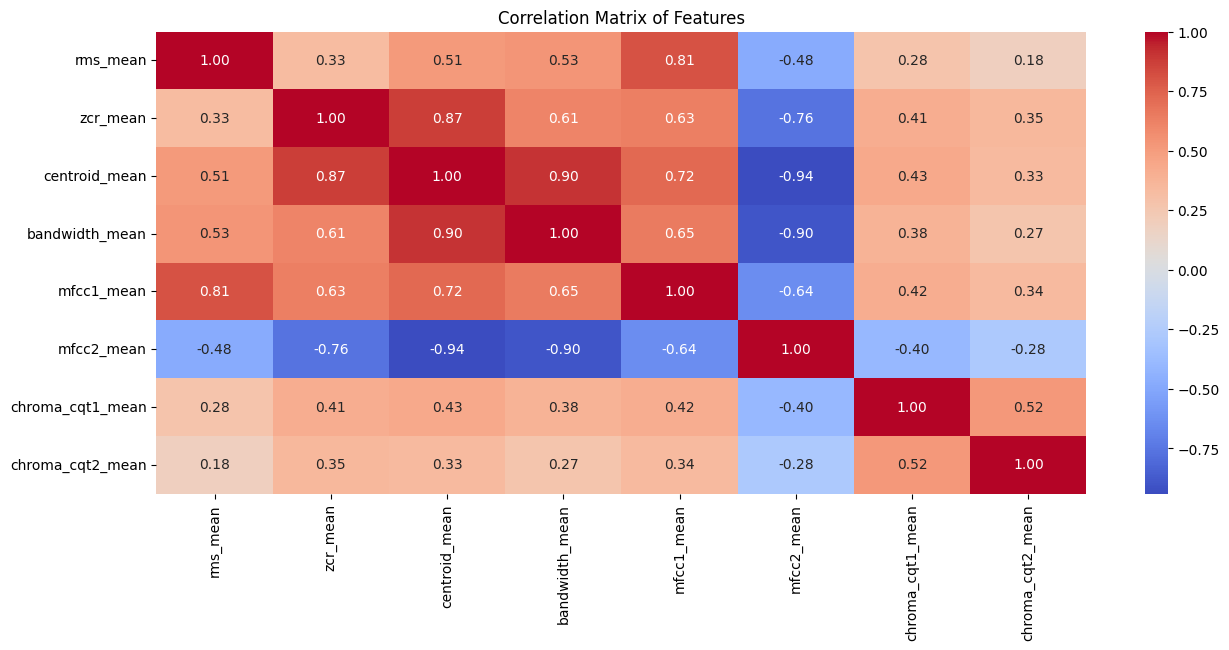

In [15]:
# Correlation matrix for numerical features
corr = df[features].corr()
# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

<div style="font-size: 20px; font-weight: bold">Splitting</div>

In [16]:
# Split into feature matrix and target vector
target = "label"
X = df.drop(columns=["filename", "label"])
y = df[target]
# Check shapes
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (999, 222)
Target shape: (999,)


In [17]:
# Perform a stratified train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# Check results
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (799, 222)
y_train shape: (799,)
X_test shape: (200, 222)
y_test shape: (200,)


<div style="font-size: 20px; font-weight: bold">Feature Scaling</div>

In [19]:
# Instantiate and fit scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Confirm scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns) 
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns) 

In [21]:
X_train_scaled_df.shape

(799, 222)

In [22]:
X_test_scaled_df.shape

(200, 222)

In [23]:
# Mean should be close to zero
print(f"X_train_scaled_df mean: {X_train_scaled_df.mean(axis=0)}")
# Std should be close to one
print(f"X_train_scaled_df std: {X_train_scaled_df.std(axis=0)}")

X_train_scaled_df mean: rms_mean                 5.335740e-17
rms_std                 -1.333935e-17
rms_max                  9.782190e-17
rms_min                 -9.893352e-17
rms_skew                 1.111613e-17
                             ...     
chroma_cqt11_std         2.756799e-16
chroma_cqt11_min        -1.022684e-16
chroma_cqt11_max         2.674540e-15
chroma_cqt11_skew       -7.114320e-17
chroma_cqt11_kurtosis    4.446450e-18
Length: 222, dtype: float64
X_train_scaled_df std: rms_mean                 1.000626
rms_std                  1.000626
rms_max                  1.000626
rms_min                  1.000626
rms_skew                 1.000626
                           ...   
chroma_cqt11_std         1.000626
chroma_cqt11_min         1.000626
chroma_cqt11_max         1.000626
chroma_cqt11_skew        1.000626
chroma_cqt11_kurtosis    1.000626
Length: 222, dtype: float64


<div style="text-align: center; font-size: 30px">ML CLASSIFICATION REVIEW & BASELINE MODELING</div>

<div style="font-size: 20px; font-weight: bold">Logistic Regression</div>

In [24]:
# Instantiate
log_reg = LogisticRegression(max_iter=1000)

In [25]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [27]:
# Evaluate results
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Logistic Regression Classification Report: {classification_report(y_test, y_pred_log_reg)}")

Logistic Regression Accuracy: 0.785
Logistic Regression Classification Report:               precision    recall  f1-score   support

       blues       0.89      0.80      0.84        20
   classical       0.95      0.90      0.92        20
     country       0.75      0.75      0.75        20
       disco       0.79      0.75      0.77        20
      hiphop       0.73      0.80      0.76        20
        jazz       0.95      0.95      0.95        20
       metal       0.90      0.90      0.90        20
         pop       0.80      0.80      0.80        20
      reggae       0.73      0.55      0.63        20
        rock       0.48      0.65      0.55        20

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



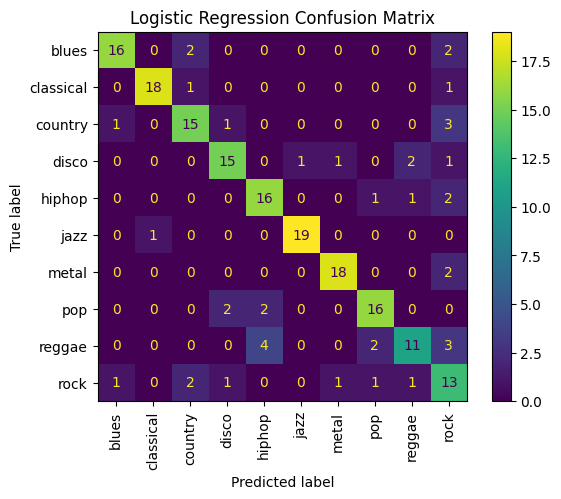

In [28]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg, xticks_rotation='vertical')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

<div style="font-size: 20px; font-weight: bold">KNeighborsClassifier</div>

In [29]:
# Instantiate and fit
k_neighbors = KNeighborsClassifier(n_neighbors=11)
k_neighbors.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [30]:
# Make predictions
y_pred_k_neighbors = k_neighbors.predict(X_test_scaled)

In [31]:
# Evaluation
print(f"KNeighborsClassifier Accuracy: {accuracy_score(y_test, y_pred_k_neighbors)}")
print(f"KNeighborsClassifier Classification Report: {classification_report(y_test, y_pred_k_neighbors)}")

KNeighborsClassifier Accuracy: 0.695
KNeighborsClassifier Classification Report:               precision    recall  f1-score   support

       blues       0.88      0.75      0.81        20
   classical       1.00      0.70      0.82        20
     country       0.59      0.85      0.69        20
       disco       0.44      0.80      0.57        20
      hiphop       0.77      0.50      0.61        20
        jazz       0.72      0.90      0.80        20
       metal       0.93      0.65      0.76        20
         pop       0.76      0.80      0.78        20
      reggae       0.86      0.60      0.71        20
        rock       0.47      0.40      0.43        20

    accuracy                           0.69       200
   macro avg       0.74      0.69      0.70       200
weighted avg       0.74      0.69      0.70       200



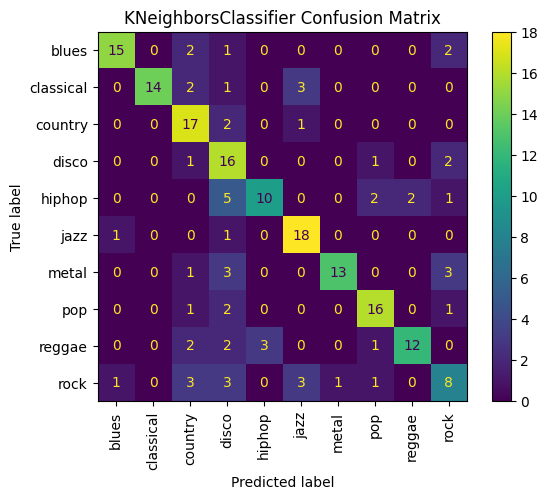

In [32]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_k_neighbors, xticks_rotation='vertical')
plt.title("KNeighborsClassifier Confusion Matrix")
plt.show()

<div style="font-size: 20px; font-weight: bold">Support Vector Machines(SVMs)</div>

In [33]:
# Instantiate and fit
svc = SVC(kernel="rbf", C=1.0, gamma="scale")
svc.fit(X_train_scaled, y_train)

SVC()

In [34]:
# Make Predictions
y_pred_svc = svc.predict(X_test_scaled)

In [35]:
# Evaluation
print(f"SVC accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(f"SVC classification report: {classification_report(y_test, y_pred_svc)}")

SVC accuracy: 0.805
SVC classification report:               precision    recall  f1-score   support

       blues       0.89      0.85      0.87        20
   classical       0.85      0.85      0.85        20
     country       0.74      0.85      0.79        20
       disco       0.70      0.80      0.74        20
      hiphop       0.80      0.80      0.80        20
        jazz       0.82      0.90      0.86        20
       metal       0.90      0.90      0.90        20
         pop       0.89      0.80      0.84        20
      reggae       0.93      0.65      0.76        20
        rock       0.62      0.65      0.63        20

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



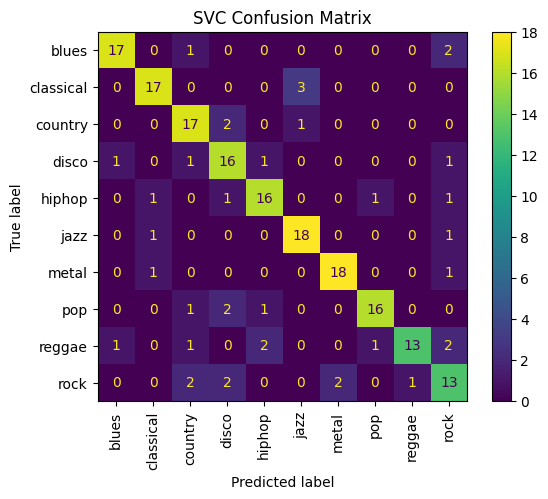

In [36]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, xticks_rotation="vertical")
plt.title("SVC Confusion Matrix")
plt.show()

**Note**
- kernel = "linear" has an accuracy score of 79, this is the baseline

<div style="font-size: 25px; font-weight: bold; color: red;">TREE-BASED MODELS, ENSEMBLES AND CROSS VALIDATION</div>

<div style="font-size: 20px; font-weight: bold">Decision Trees</div>

In [37]:
# Instantiate and Fit Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train_scaled, y_train)
# Make Prediction
tree_pred = clf.predict(X_test_scaled)

In [38]:
y_train.unique()

array(['jazz', 'country', 'rock', 'hiphop', 'pop', 'reggae', 'metal',
       'blues', 'classical', 'disco'], dtype=object)

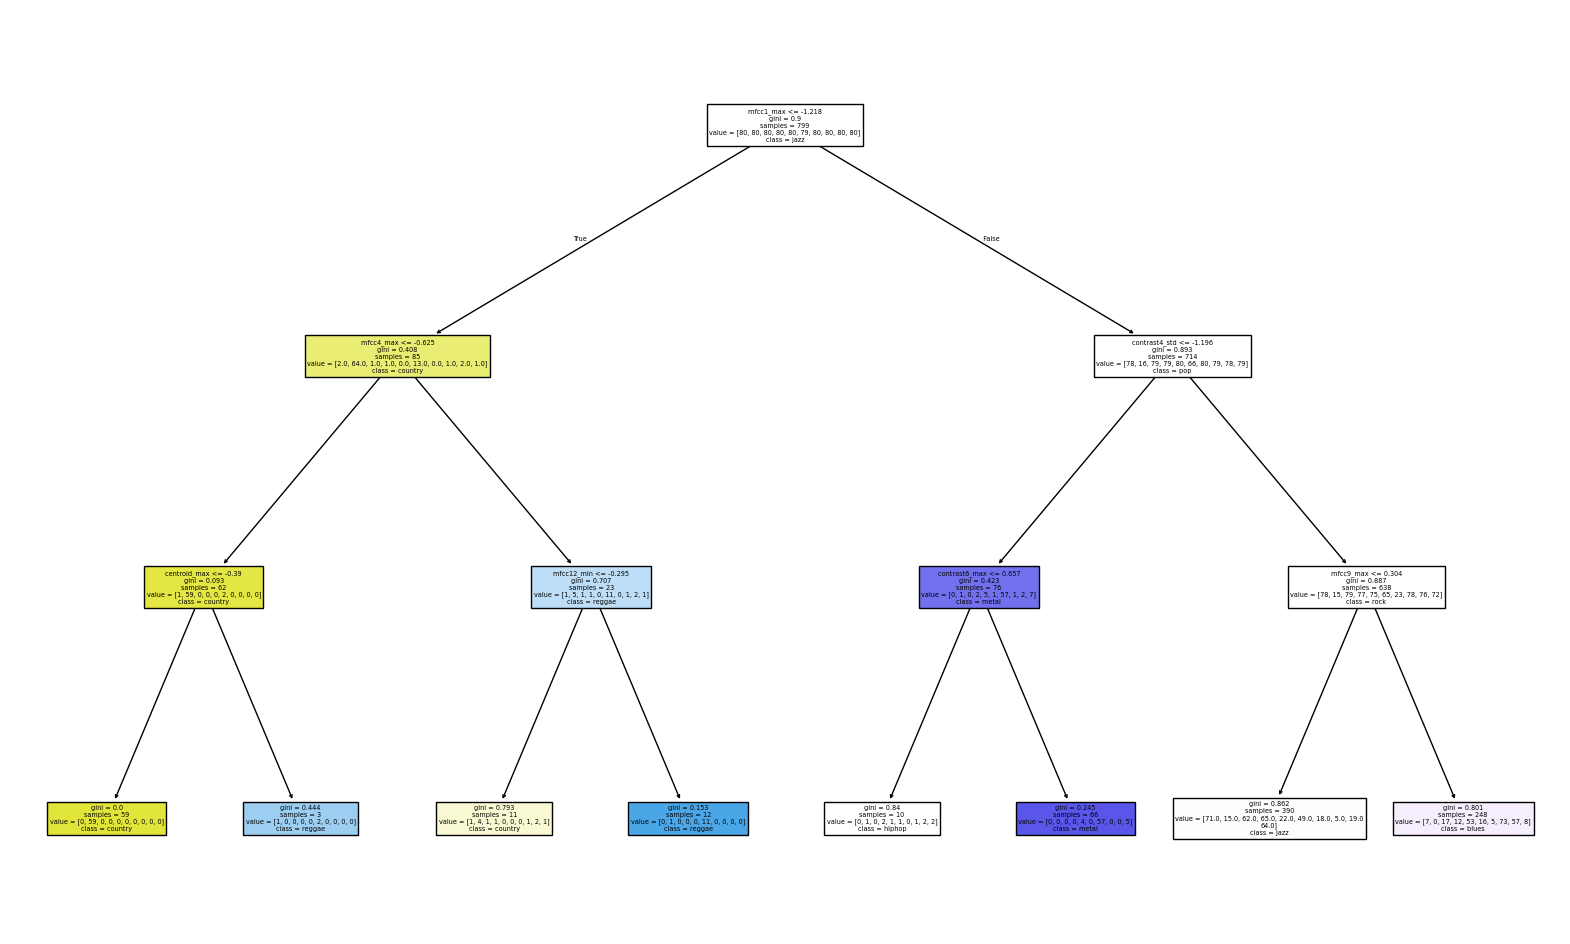

In [39]:
# Visualize the Decision Making
plt.figure(figsize=(20, 12))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [40]:
# Hyper-parameter Tuning
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, 13],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Set up grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

# Best tree
best_tree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


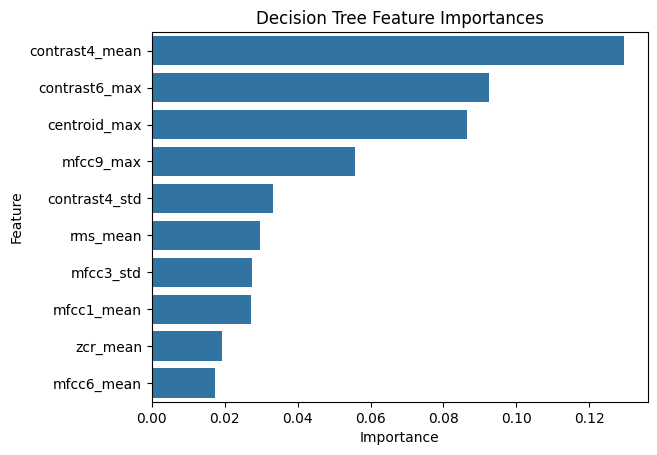

In [41]:
# Plot Feature Importances
importances = best_tree.feature_importances_

# Plot 10 most important features
df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
sns.barplot(x="Importance", y="Feature", data=df.sort_values(by="Importance", ascending=False).head(10))
plt.title("Decision Tree Feature Importances")
plt.show()

In [44]:
# Estract the predictions of the best tree
best_tree_pred = best_tree.predict(X_test_scaled)

In [46]:
# Evaluation
print(f"Best tree accuracy:", accuracy_score(y_test, best_tree_pred))
print(f"First tree accuracy:", accuracy_score(y_test, tree_pred))

Best tree accuracy: 0.54
First tree accuracy: 0.32


In [47]:
y_train_pred = best_tree.predict(X_train_scaled)

In [49]:
# Is the tree overfitting?
print(f"Best tree training accuracy:", accuracy_score(y_train, y_train_pred))
print(f"Best tree test accuracy:", accuracy_score(y_test, best_tree_pred))

Best tree training accuracy: 0.9086357947434293
Best tree test accuracy: 0.54
